# Analyzing my Amazon Halo Workout Data

I try to consolidate the number of times I have to import packages. Everything I need should be in the first code block.

In [6]:
import pandas as pd
import numpy as np
from sklearn import metrics
# Evaluation metrics related methods
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix, precision_recall_fscore_support, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import warnings 
warnings.filterwarnings('ignore')

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
import xml.etree.ElementTree as ET

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import norm
from scipy import stats
sns.set()

rs = 123

I need to read my halo workout data in as a pandas dataframe

In [186]:
amazon_data = pd.read_csv(r'C:\Users\coleb\OneDrive\Corel\Datasets\Amazon Health Data\Activity\Activity_Workouts_1970-01-01--2022-04-24_a4815fda-80a6-4513-bfe3-638c2c6acf13.csv')

In [187]:
amazon_data.head(15)

,Start Time,End Time,Session Type,Session Subtype,Creation Method,Local Time Zone Offset,Activity Score,Intense Duration (ms),Moderate Duration (ms),Max Heart Rate (bpm),Average Heart Rate (bpm),Steps,Calories,Software Version,Software OS,Software OS Version,Active Time (ms),Total Duration (ms),Activity Pause
0,2022-04-23T05:57:36.270Z,2022-04-23T06:29:02.484Z,WORKOUT,RUNNING,Automatic,-5.0,58.061175000000006,1620000.0,242484.0,145.0,134.0,4585.0,470.0,1.0.107826,ios,15.4,1886214.0,1886214.0,Not Applicable
1,2022-04-22T04:25:46.584Z,2022-04-22T04:57:41.491Z,WORKOUT,RUNNING,Automatic,-5.0,57.74151666666666,1620000.0,221491.0,144.0,130.0,4626.0,455.0,1.0.107826,ios,15.4,1914907.0,1914907.0,Not Applicable
2,2022-04-21T12:59:00.000Z,2022-04-21T13:27:00.000Z,WORKOUT,OTHER,Automatic,-5.0,23.2,No Data,1380000.0,115.0,98.0,1124.0,176.0,1.0.107826,ios,15.4,1680000.0,1680000.0,Not Applicable
3,2022-04-21T12:23:29.044Z,2022-04-21T12:58:35.262Z,WORKOUT,RUNNING,Automatic,-5.0,63.713496666666664,1860000.0,95262.0,173.0,150.0,4952.0,616.0,1.0.107826,ios,15.4,2106218.0,2106218.0,Not Applicable
4,2022-04-19T13:13:00.000Z,2022-04-19T13:46:00.000Z,WORKOUT,OTHER,Automatic,-5.0,12.85,No Data,720000.0,120.0,93.0,1510.0,177.0,1.0.107826,ios,15.4,1980000.0,1980000.0,Not Applicable
5,2022-04-19T12:13:38.960Z,2022-04-19T13:02:46.774Z,WORKOUT,RUNNING,Automatic,-5.0,96.9098,2866774.0,81040.0,168.0,151.0,7840.0,895.0,1.0.107826,ios,15.4,2947814.0,2947814.0,Not Applicable
6,2022-04-18T12:44:00.000Z,2022-04-18T13:17:00.000Z,WORKOUT,OTHER,Automatic,-5.0,16.85,No Data,960000.0,117.0,96.0,1501.0,178.0,1.0.107826,ios,15.4,1980000.0,1980000.0,Not Applicable
7,2022-04-18T12:09:17.368Z,2022-04-18T12:43:26.749Z,WORKOUT,RUNNING,Automatic,-5.0,62.481343333333335,1740000.0,266749.0,168.0,147.0,4948.0,583.0,1.0.107826,ios,15.4,2049381.0,2049381.0,Not Applicable
8,2022-04-17T17:12:26.888Z,2022-04-17T17:46:36.214Z,WORKOUT,RUNNING,Automatic,-5.0,62.63116,1740000.0,276214.0,148.0,131.0,4850.0,497.0,1.0.107826,ios,15.4,2049326.0,2049326.0,Not Applicable
9,2022-04-03T22:34:10.068Z,2022-04-03T23:50:01.210Z,WORKOUT,WALKING,Automatic,-4.0,14.642618333333333,No Data,720000.0,117.0,96.0,6242.0,647.0,1.0.106045,ios,15.4,4551142.0,4551142.0,Not Applicable


In [188]:
#create a workable copy of the dataset
df = amazon_data

In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Start Time                231 non-null    object 
 1   End Time                  231 non-null    object 
 2   Session Type              231 non-null    object 
 3   Session Subtype           231 non-null    object 
 4   Creation Method           231 non-null    object 
 5   Local Time Zone Offset    231 non-null    float64
 6   Activity Score            231 non-null    object 
 7   Intense Duration (ms)     231 non-null    object 
 8   Moderate Duration (ms)    231 non-null    object 
 9   Max Heart Rate (bpm)      231 non-null    float64
 10  Average Heart Rate (bpm)  231 non-null    float64
 11  Steps                     231 non-null    float64
 12  Calories                  231 non-null    float64
 13  Software Version          231 non-null    object 
 14  Software O

<AxesSubplot:xlabel='Start Time'>

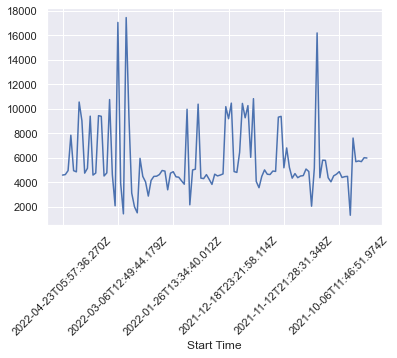

In [190]:
# show data with a mask filter (running only)
#I want to plot the old time to check my work later
mask1 = df['Session Subtype'] == 'RUNNING'
(
    df[mask1]
    .set_index('Start Time')
    ['Steps']
    .plot(rot = 45)
)

In [191]:
df.head(4)

,Start Time,End Time,Session Type,Session Subtype,Creation Method,Local Time Zone Offset,Activity Score,Intense Duration (ms),Moderate Duration (ms),Max Heart Rate (bpm),Average Heart Rate (bpm),Steps,Calories,Software Version,Software OS,Software OS Version,Active Time (ms),Total Duration (ms),Activity Pause
0,2022-04-23T05:57:36.270Z,2022-04-23T06:29:02.484Z,WORKOUT,RUNNING,Automatic,-5.0,58.061175000000006,1620000.0,242484.0,145.0,134.0,4585.0,470.0,1.0.107826,ios,15.4,1886214.0,1886214.0,Not Applicable
1,2022-04-22T04:25:46.584Z,2022-04-22T04:57:41.491Z,WORKOUT,RUNNING,Automatic,-5.0,57.74151666666666,1620000.0,221491.0,144.0,130.0,4626.0,455.0,1.0.107826,ios,15.4,1914907.0,1914907.0,Not Applicable
2,2022-04-21T12:59:00.000Z,2022-04-21T13:27:00.000Z,WORKOUT,OTHER,Automatic,-5.0,23.2,No Data,1380000.0,115.0,98.0,1124.0,176.0,1.0.107826,ios,15.4,1680000.0,1680000.0,Not Applicable
3,2022-04-21T12:23:29.044Z,2022-04-21T12:58:35.262Z,WORKOUT,RUNNING,Automatic,-5.0,63.713496666666664,1860000.0,95262.0,173.0,150.0,4952.0,616.0,1.0.107826,ios,15.4,2106218.0,2106218.0,Not Applicable


## Converting Time

In [192]:
#I will use the datetime and pytz packages to convert my time/dates
from datetime import datetime
from pytz import timezone
import pytz
central = timezone('US/Central')
time_stamp = '2022-04-23T05:57:36.270Z'
published_time = datetime.strptime(time_stamp, '%Y-%m-%dT%H:%M:%S.%f%z')
published_cst = published_time.astimezone(central)
actual_time_published = published_cst.strftime('%a, %b %d %Y at %I:%M:%S %p %Z')

print(time_stamp)
print(published_time)
print(published_cst)
print(actual_time_published)

2022-04-23T05:57:36.270Z
2022-04-23 05:57:36.270000+00:00
2022-04-23 00:57:36.270000-05:00
Sat, Apr 23 2022 at 12:57:36 AM CDT


In [208]:
list(map(lambda x: datetime.strptime(x,'%Y-%m-%dT%H:%M:%S.%f%z').strftime('%a, %b %d %Y at %I:%M:%S %p %Z'), df['Start Time']))
pd.to_datetime(df['Start Time'], format='%Y-%m-%dT%H:%M:%S.%f%z')


def date_convert(date_to_convert):
     return datetime.strptime(date_to_convert,
                                       '%Y-%m-%dT%H:%M:%S.%f%z').strftime('%a, %b %d %Y at %I:%M:%S %p %Z')

df['Local Start Time'] = df['Start Time'].apply(date_convert)
df.head(2)

,Start Time,End Time,Session Type,Session Subtype,Creation Method,Local Time Zone Offset,Activity Score,Intense Duration (ms),Moderate Duration (ms),Max Heart Rate (bpm),Average Heart Rate (bpm),Steps,Calories,Software Version,Software OS,Software OS Version,Active Time (ms),Total Duration (ms),Activity Pause,Local Start Time
0,2022-04-23T05:57:36.270Z,2022-04-23T06:29:02.484Z,WORKOUT,RUNNING,Automatic,-5.0,58.061175000000006,1620000.0,242484.0,145.0,134.0,4585.0,470.0,1.0.107826,ios,15.4,1886214.0,1886214.0,Not Applicable,"Sat, Apr 23 2022 at 05:57:36 AM UTC"
1,2022-04-22T04:25:46.584Z,2022-04-22T04:57:41.491Z,WORKOUT,RUNNING,Automatic,-5.0,57.74151666666666,1620000.0,221491.0,144.0,130.0,4626.0,455.0,1.0.107826,ios,15.4,1914907.0,1914907.0,Not Applicable,"Fri, Apr 22 2022 at 04:25:46 AM UTC"


In [209]:
list(map(lambda x: datetime.strptime(x,'%Y-%m-%dT%H:%M:%S.%f%z').strftime('%a, %b %d %Y at %I:%M:%S %p %Z'), df['End Time']))
pd.to_datetime(df['End Time'], format='%Y-%m-%dT%H:%M:%S.%f%z')


def date_convert(date_to_convert):
     return datetime.strptime(date_to_convert,
                                       '%Y-%m-%dT%H:%M:%S.%f%z').strftime('%a, %b %d %Y at %I:%M:%S %p %Z')

df['Local End Time'] = df['End Time'].apply(date_convert)
df.head(2)

,Start Time,End Time,Session Type,Session Subtype,Creation Method,Local Time Zone Offset,Activity Score,Intense Duration (ms),Moderate Duration (ms),Max Heart Rate (bpm),...,Steps,Calories,Software Version,Software OS,Software OS Version,Active Time (ms),Total Duration (ms),Activity Pause,Local Start Time,Local End Time
0,2022-04-23T05:57:36.270Z,2022-04-23T06:29:02.484Z,WORKOUT,RUNNING,Automatic,-5.0,58.061175000000006,1620000.0,242484.0,145.0,...,4585.0,470.0,1.0.107826,ios,15.4,1886214.0,1886214.0,Not Applicable,"Sat, Apr 23 2022 at 05:57:36 AM UTC","Sat, Apr 23 2022 at 06:29:02 AM UTC"
1,2022-04-22T04:25:46.584Z,2022-04-22T04:57:41.491Z,WORKOUT,RUNNING,Automatic,-5.0,57.74151666666666,1620000.0,221491.0,144.0,...,4626.0,455.0,1.0.107826,ios,15.4,1914907.0,1914907.0,Not Applicable,"Fri, Apr 22 2022 at 04:25:46 AM UTC","Fri, Apr 22 2022 at 04:57:41 AM UTC"


In [198]:
# #create a for loop with the updated timezone instructions. This will add a new column.

# central = timezone('US/Central')
# time_stamp = '2022-04-23T05:57:36.270Z'
# published_time = datetime.strptime(df['Start Time'], '%Y-%m-%dT%H:%M:%S.%f%z')
# published_cst = published_time.astimezone(central)
# actual_time_published = published_cst.strftime('%a, %b %d %Y at %I:%M:%S %p %Z')
# df['Local Start Time'] = published_cst.strftime('%a, %b %d %Y at %I:%M:%S %p %Z')
        

# # for item in df['End Time']:
# #         central = timezone('US/Central')
# #         time_stamp = '2022-04-23T05:57:36.270Z'
# #         published_time = datetime.strptime(time_stamp, '%Y-%m-%dT%H:%M:%S.%f%z')
# #         published_cst = published_time.astimezone(central)
# #         actual_time_published = published_cst.strftime('%a, %b %d %Y at %I:%M:%S %p %Z')
# #         df['Local End Time'] = published_cst.strftime('%a, %b %d %Y at %I:%M:%S %p %Z')


TypeError: strptime() argument 1 must be str, not Series

In [210]:
df.head(2)

,Start Time,End Time,Session Type,Session Subtype,Creation Method,Local Time Zone Offset,Activity Score,Intense Duration (ms),Moderate Duration (ms),Max Heart Rate (bpm),...,Steps,Calories,Software Version,Software OS,Software OS Version,Active Time (ms),Total Duration (ms),Activity Pause,Local Start Time,Local End Time
0,2022-04-23T05:57:36.270Z,2022-04-23T06:29:02.484Z,WORKOUT,RUNNING,Automatic,-5.0,58.061175000000006,1620000.0,242484.0,145.0,...,4585.0,470.0,1.0.107826,ios,15.4,1886214.0,1886214.0,Not Applicable,"Sat, Apr 23 2022 at 05:57:36 AM UTC","Sat, Apr 23 2022 at 06:29:02 AM UTC"
1,2022-04-22T04:25:46.584Z,2022-04-22T04:57:41.491Z,WORKOUT,RUNNING,Automatic,-5.0,57.74151666666666,1620000.0,221491.0,144.0,...,4626.0,455.0,1.0.107826,ios,15.4,1914907.0,1914907.0,Not Applicable,"Fri, Apr 22 2022 at 04:25:46 AM UTC","Fri, Apr 22 2022 at 04:57:41 AM UTC"


In [211]:
#I want to pull just the day out of the start/end times
df['Local Start Time DTG'] = pd.to_datetime(df['Local Start Time'])
df['day_of_week_start']=df['Local Start Time DTG'].dt.day_name()
df['Local End Time DTG'] = pd.to_datetime(df['Local End Time'])
df['day_of_week_end']=df['Local End Time DTG'].dt.day_name()

In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   Start Time                231 non-null    object             
 1   End Time                  231 non-null    object             
 2   Session Type              231 non-null    object             
 3   Session Subtype           231 non-null    object             
 4   Creation Method           231 non-null    object             
 5   Local Time Zone Offset    231 non-null    float64            
 6   Activity Score            231 non-null    object             
 7   Intense Duration (ms)     231 non-null    object             
 8   Moderate Duration (ms)    231 non-null    object             
 9   Max Heart Rate (bpm)      231 non-null    float64            
 10  Average Heart Rate (bpm)  231 non-null    float64            
 11  Steps              

In [213]:
#some of my numbers are string objects so I need to convert them to floats
df['Activity Score'] = pd.to_numeric(df['Activity Score'],errors='coerce')
df['Intense Duration (ms)'] = pd.to_numeric(df['Intense Duration (ms)'],errors='coerce')
df['Moderate Duration (ms)'] = pd.to_numeric(df['Moderate Duration (ms)'],errors='coerce')

In [214]:
#I want the entire dataframe to be rounded to 2 places
df = df.round(2)

In [215]:
#check my work
df.head(2)

,Start Time,End Time,Session Type,Session Subtype,Creation Method,Local Time Zone Offset,Activity Score,Intense Duration (ms),Moderate Duration (ms),Max Heart Rate (bpm),...,Software OS Version,Active Time (ms),Total Duration (ms),Activity Pause,Local Start Time,Local End Time,Local Start Time DTG,day_of_week_start,Local End Time DTG,day_of_week_end
0,2022-04-23T05:57:36.270Z,2022-04-23T06:29:02.484Z,WORKOUT,RUNNING,Automatic,-5.0,58.06,1620000.0,242484.0,145.0,...,15.4,1886214.0,1886214.0,Not Applicable,"Sat, Apr 23 2022 at 05:57:36 AM UTC","Sat, Apr 23 2022 at 06:29:02 AM UTC",2022-04-23 05:57:36+00:00,Saturday,2022-04-23 06:29:02+00:00,Saturday
1,2022-04-22T04:25:46.584Z,2022-04-22T04:57:41.491Z,WORKOUT,RUNNING,Automatic,-5.0,57.74,1620000.0,221491.0,144.0,...,15.4,1914907.0,1914907.0,Not Applicable,"Fri, Apr 22 2022 at 04:25:46 AM UTC","Fri, Apr 22 2022 at 04:57:41 AM UTC",2022-04-22 04:25:46+00:00,Friday,2022-04-22 04:57:41+00:00,Friday


In [216]:
df.columns

Index(['Start Time', 'End Time', 'Session Type', 'Session Subtype',
       'Creation Method', 'Local Time Zone Offset', 'Activity Score',
       'Intense Duration (ms)', 'Moderate Duration (ms)',
       'Max Heart Rate (bpm)', 'Average Heart Rate (bpm)', 'Steps', 'Calories',
       'Software Version', 'Software OS', 'Software OS Version',
       'Active Time (ms)', 'Total Duration (ms)', 'Activity Pause',
       'Local Start Time', 'Local End Time', 'Local Start Time DTG',
       'day_of_week_start', 'Local End Time DTG', 'day_of_week_end'],
      dtype='object')

In [217]:
#I want to re-arrange my columns so I can focus on the important items.
df = df[['Session Subtype', 'Activity Score', 'Intense Duration (ms)',
         'Moderate Duration (ms)','Active Time (ms)', 'Average Heart Rate (bpm)',
         'Max Heart Rate (bpm)','Steps', 'Calories',
         'Total Duration (ms)', 'Local Start Time DTG', 'Local End Time DTG',
         'day_of_week_start', 'day_of_week_end', 'Local Start Time', 'Local End Time']]

In [218]:
#double check that I have all my columns still
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   Session Subtype           231 non-null    object             
 1   Activity Score            230 non-null    float64            
 2   Intense Duration (ms)     124 non-null    float64            
 3   Moderate Duration (ms)    206 non-null    float64            
 4   Active Time (ms)          231 non-null    float64            
 5   Average Heart Rate (bpm)  231 non-null    float64            
 6   Max Heart Rate (bpm)      231 non-null    float64            
 7   Steps                     231 non-null    float64            
 8   Calories                  231 non-null    float64            
 9   Total Duration (ms)       231 non-null    float64            
 10  Local Start Time DTG      231 non-null    datetime64[ns, UTC]
 11  Local End Time DTG 

## MS to Minutes and Seconds

In [219]:
df.head(2)

,Session Subtype,Activity Score,Intense Duration (ms),Moderate Duration (ms),Active Time (ms),Average Heart Rate (bpm),Max Heart Rate (bpm),Steps,Calories,Total Duration (ms),Local Start Time DTG,Local End Time DTG,day_of_week_start,day_of_week_end,Local Start Time,Local End Time
0,RUNNING,58.06,1620000.0,242484.0,1886214.0,134.0,145.0,4585.0,470.0,1886214.0,2022-04-23 05:57:36+00:00,2022-04-23 06:29:02+00:00,Saturday,Saturday,"Sat, Apr 23 2022 at 05:57:36 AM UTC","Sat, Apr 23 2022 at 06:29:02 AM UTC"
1,RUNNING,57.74,1620000.0,221491.0,1914907.0,130.0,144.0,4626.0,455.0,1914907.0,2022-04-22 04:25:46+00:00,2022-04-22 04:57:41+00:00,Friday,Friday,"Fri, Apr 22 2022 at 04:25:46 AM UTC","Fri, Apr 22 2022 at 04:57:41 AM UTC"


In [220]:
#seconds = (milliseconds / 1000) % 60 ;
#minutes = ((milliseconds / (1000*60)) % 60);
#hours   = ((milliseconds / (1000*60*60)) % 24);
df['Active Time (sec)'] = (df['Active Time (ms)'] / 1000) % 60
df['Active Time (min)'] = (df['Active Time (ms)'] / (1000*60)) % 60
df['Active Time (hour)'] = (df['Active Time (ms)'] / (1000*60*60) % 24)
df['Active Time (total min)'] = (df['Active Time (ms)'] / (1000*60))    

In [227]:
df = df.round(2)
df.info()
df.head(18)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   Session Subtype           231 non-null    object             
 1   Activity Score            230 non-null    float64            
 2   Intense Duration (ms)     124 non-null    float64            
 3   Moderate Duration (ms)    206 non-null    float64            
 4   Active Time (ms)          231 non-null    float64            
 5   Average Heart Rate (bpm)  231 non-null    float64            
 6   Max Heart Rate (bpm)      231 non-null    float64            
 7   Steps                     231 non-null    float64            
 8   Calories                  231 non-null    float64            
 9   Total Duration (ms)       231 non-null    float64            
 10  Local Start Time DTG      231 non-null    datetime64[ns, UTC]
 11  Local End Time DTG 

,Session Subtype,Activity Score,Intense Duration (ms),Moderate Duration (ms),Active Time (ms),Average Heart Rate (bpm),Max Heart Rate (bpm),Steps,Calories,Total Duration (ms),Local Start Time DTG,Local End Time DTG,day_of_week_start,day_of_week_end,Local Start Time,Local End Time,Active Time (sec),Active Time (min),Active Time (hour),Active Time (total min)
0,RUNNING,58.06,1620000.0,242484.0,1886214.0,134.0,145.0,4585.0,470.0,1886214.0,2022-04-23 05:57:36+00:00,2022-04-23 06:29:02+00:00,Saturday,Saturday,"Sat, Apr 23 2022 at 05:57:36 AM UTC","Sat, Apr 23 2022 at 06:29:02 AM UTC",26.21,31.44,0.52,31.44
1,RUNNING,57.74,1620000.0,221491.0,1914907.0,130.0,144.0,4626.0,455.0,1914907.0,2022-04-22 04:25:46+00:00,2022-04-22 04:57:41+00:00,Friday,Friday,"Fri, Apr 22 2022 at 04:25:46 AM UTC","Fri, Apr 22 2022 at 04:57:41 AM UTC",54.91,31.92,0.53,31.92
2,OTHER,23.20,NaN,1380000.0,1680000.0,98.0,115.0,1124.0,176.0,1680000.0,2022-04-21 12:59:00+00:00,2022-04-21 13:27:00+00:00,Thursday,Thursday,"Thu, Apr 21 2022 at 12:59:00 PM UTC","Thu, Apr 21 2022 at 01:27:00 PM UTC",0.00,28.00,0.47,28.00
3,RUNNING,63.71,1860000.0,95262.0,2106218.0,150.0,173.0,4952.0,616.0,2106218.0,2022-04-21 12:23:29+00:00,2022-04-21 12:58:35+00:00,Thursday,Thursday,"Thu, Apr 21 2022 at 12:23:29 PM UTC","Thu, Apr 21 2022 at 12:58:35 PM UTC",6.22,35.10,0.59,35.10
4,OTHER,12.85,NaN,720000.0,1980000.0,93.0,120.0,1510.0,177.0,1980000.0,2022-04-19 13:13:00+00:00,2022-04-19 13:46:00+00:00,Tuesday,Tuesday,"Tue, Apr 19 2022 at 01:13:00 PM UTC","Tue, Apr 19 2022 at 01:46:00 PM UTC",0.00,33.00,0.55,33.00
5,RUNNING,96.91,2866774.0,81040.0,2947814.0,151.0,168.0,7840.0,895.0,2947814.0,2022-04-19 12:13:38+00:00,2022-04-19 13:02:46+00:00,Tuesday,Tuesday,"Tue, Apr 19 2022 at 12:13:38 PM UTC","Tue, Apr 19 2022 at 01:02:46 PM UTC",7.81,49.13,0.82,49.13
6,OTHER,16.85,NaN,960000.0,1980000.0,96.0,117.0,1501.0,178.0,1980000.0,2022-04-18 12:44:00+00:00,2022-04-18 13:17:00+00:00,Monday,Monday,"Mon, Apr 18 2022 at 12:44:00 PM UTC","Mon, Apr 18 2022 at 01:17:00 PM UTC",0.00,33.00,0.55,33.00
7,RUNNING,62.48,1740000.0,266749.0,2049381.0,147.0,168.0,4948.0,583.0,2049381.0,2022-04-18 12:09:17+00:00,2022-04-18 12:43:26+00:00,Monday,Monday,"Mon, Apr 18 2022 at 12:09:17 PM UTC","Mon, Apr 18 2022 at 12:43:26 PM UTC",9.38,34.16,0.57,34.16
8,RUNNING,62.63,1740000.0,276214.0,2049326.0,131.0,148.0,4850.0,497.0,2049326.0,2022-04-17 17:12:26+00:00,2022-04-17 17:46:36+00:00,Sunday,Sunday,"Sun, Apr 17 2022 at 05:12:26 PM UTC","Sun, Apr 17 2022 at 05:46:36 PM UTC",9.33,34.16,0.57,34.16
9,WALKING,14.64,NaN,720000.0,4551142.0,96.0,117.0,6242.0,647.0,4551142.0,2022-04-03 22:34:10+00:00,2022-04-03 23:50:01+00:00,Sunday,Sunday,"Sun, Apr 03 2022 at 10:34:10 PM UTC","Sun, Apr 03 2022 at 11:50:01 PM UTC",51.14,15.85,1.26,75.85


## EDA

<AxesSubplot:xlabel='Local Start Time DTG'>

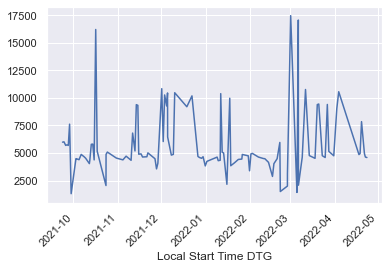

In [222]:
# show data with a mask filter (running only)
mask1 = df['Session Subtype'] == 'RUNNING'
(
    df[mask1]
    .set_index('Local Start Time DTG')
    ['Steps']
    .plot(rot = 45)
)

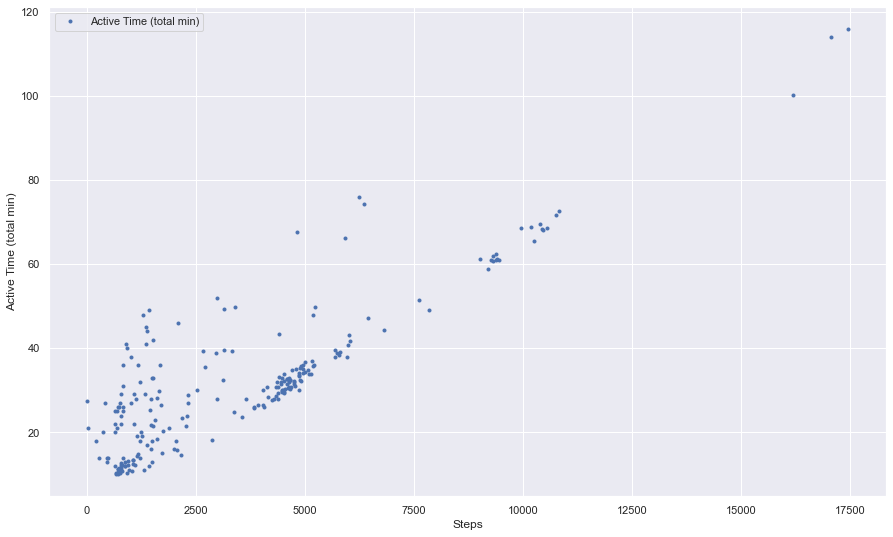

In [228]:
#scatter plotting my steps against my total minutes
axes = df.plot(x='Steps', y='Active Time (total min)', style='.',figsize=(15,9))
y_label = axes.set_ylabel('Active Time (total min)')

In [230]:
#I plan on joining this with my Map My Run Data to get the mileage, so I will pull just the date
df['Workout_Date'] = pd.to_datetime(df['Local Start Time DTG']).dt.date

In [231]:
df.head(1)

,Session Subtype,Activity Score,Intense Duration (ms),Moderate Duration (ms),Active Time (ms),Average Heart Rate (bpm),Max Heart Rate (bpm),Steps,Calories,Total Duration (ms),...,Local End Time DTG,day_of_week_start,day_of_week_end,Local Start Time,Local End Time,Active Time (sec),Active Time (min),Active Time (hour),Active Time (total min),Workout_Date
0,RUNNING,58.06,1620000.0,242484.0,1886214.0,134.0,145.0,4585.0,470.0,1886214.0,...,2022-04-23 06:29:02+00:00,Saturday,Saturday,"Sat, Apr 23 2022 at 05:57:36 AM UTC","Sat, Apr 23 2022 at 06:29:02 AM UTC",26.21,31.44,0.52,31.44,2022-04-23


In [ ]:
mmr_df = pd.read_csv('')